In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Load dataset
df = pd.read_csv('/content/faceData.csv')

In [2]:
# Features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:

# Store results
model_names = []
accuracies = []
reports = {}
conf_matrices = {}

# ---- SVM ----
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)
acc = accuracy_score(y_test, svm_preds)
model_names.append("SVM")
accuracies.append(acc)
reports["SVM"] = classification_report(y_test, svm_preds, output_dict=True)
conf_matrices["SVM"] = confusion_matrix(y_test, svm_preds)

# ---- KNN ----
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, knn_preds)
model_names.append("KNN")
accuracies.append(acc)
reports["KNN"] = classification_report(y_test, knn_preds, output_dict=True)
conf_matrices["KNN"] = confusion_matrix(y_test, knn_preds)

# ---- XGBoost ----
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
acc = accuracy_score(y_test, xgb_preds)
model_names.append("XGBoost")
accuracies.append(acc)
reports["XGBoost"] = classification_report(y_test, xgb_preds, output_dict=True)
conf_matrices["XGBoost"] = confusion_matrix(y_test, xgb_preds)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [4]:
# ---- CNN ----
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=15, batch_size=32, verbose=0)

cnn_preds = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
acc = accuracy_score(y_test, cnn_preds)
model_names.append("CNN")
accuracies.append(acc)
reports["CNN"] = classification_report(y_test, cnn_preds, output_dict=True)
conf_matrices["CNN"] = confusion_matrix(y_test, cnn_preds)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-5-2194011367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


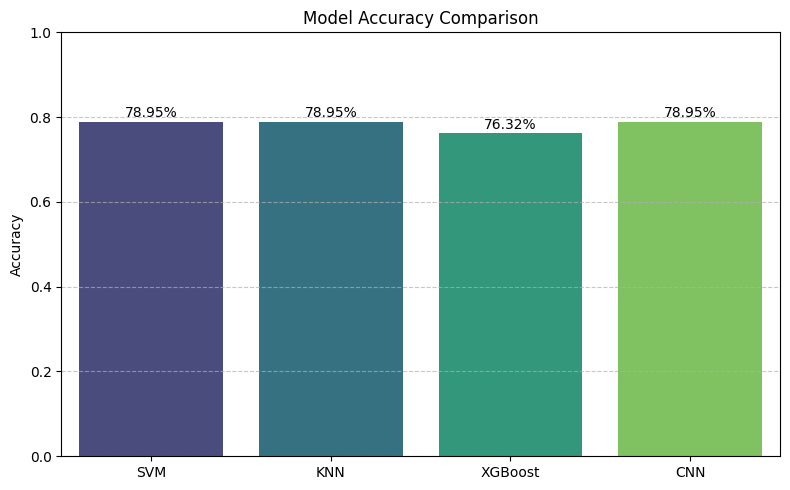

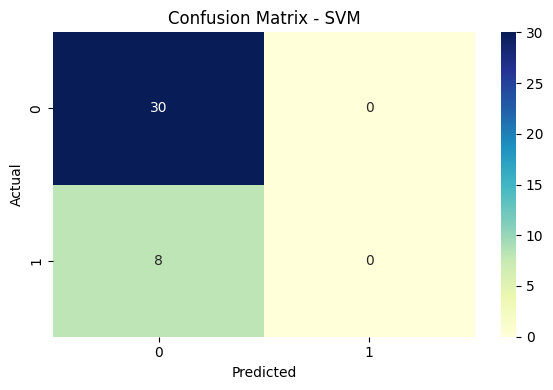

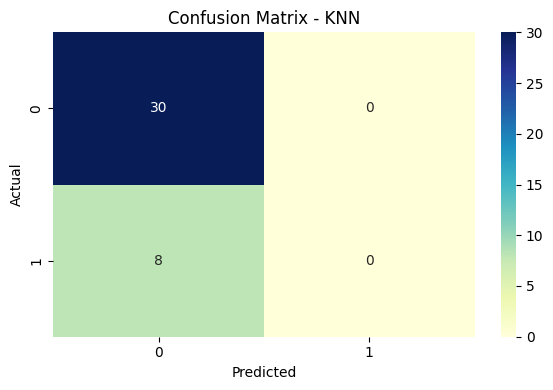

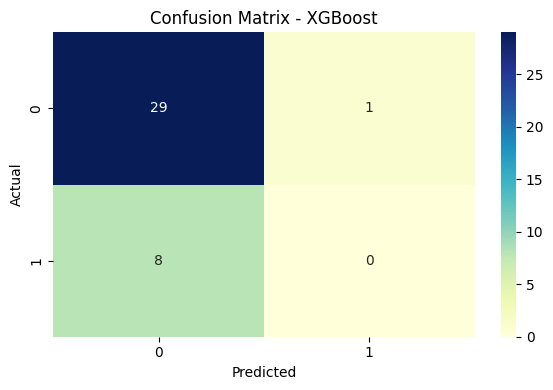

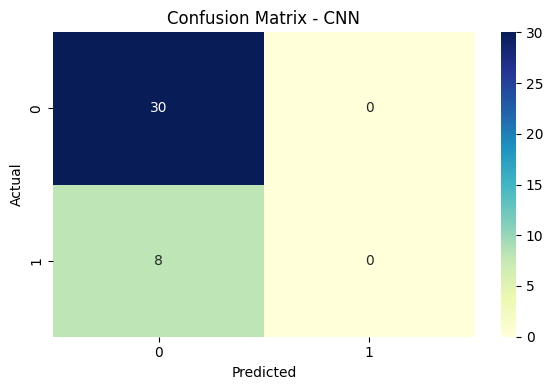

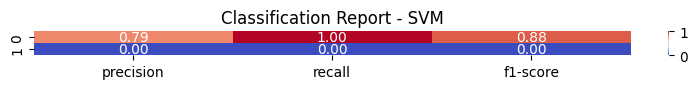

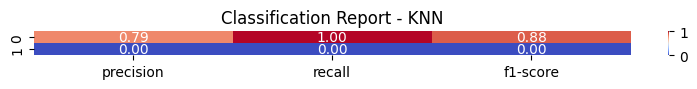

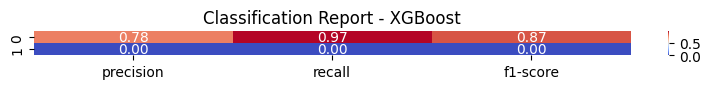

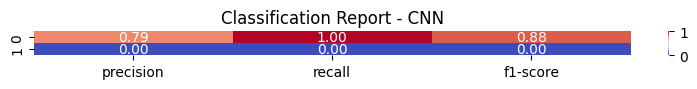

In [5]:
# ---------- Plot Accuracy Bar Chart ----------
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc*100:.2f}%", ha='center')
plt.tight_layout()
plt.show()

# ---------- Plot Confusion Matrices ----------
for model in model_names:
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrices[model], annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Confusion Matrix - {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# ---------- Plot Classification Report Heatmaps ----------
for model in model_names:
    report = reports[model]
    report_df = pd.DataFrame(report).transpose().iloc[:-3, :]  # remove accuracy/macro/micro avg
    plt.figure(figsize=(8, len(report_df)*0.5))
    sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Classification Report - {model}")
    plt.tight_layout()
    plt.show()